In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

train_df['Start Date'] = pd.to_datetime(train_df['Start Date'],errors='coerce')
train_df['End Date'] = pd.to_datetime(train_df['End Date'],errors='coerce')
# train_df['End Date'].fillna(value=train_df['End Date'].max(),inplace=True)
# train_df['Start Month'] = train_df['Start Date'].dt.month
# train_df['Start Day'] = train_df['Start Date'].dt.day
# train_df['Start Year'] = train_df['Start Date'].dt.year
# train_df['End Month'] = train_df['End Date'].dt.month
# train_df['End Day'] = train_df['End Date'].dt.day
# train_df['End Year'] = train_df['End Date'].dt.year
train_df['Duration']= train_df['End Date'] - train_df['Start Date']
train_df['Duration'] = train_df['Duration'].dt.days
check_df = train_df.loc[train_df['Status']=='Success',:]
# check_df = train_df.loc[train_df['Start Date']>train_df['End Date'],:]
# train_df.loc[train_df.Duration<0,'Duration'] = None
print(check_df)

# print(train_df.head())
# print(train_df.describe())
# print(train_df.info())

          ID Start Date   End Date               Category         Currency  \
6          7 2014-03-25 2014-05-04           Film & Video              USD   
7          8 2014-02-21 2014-03-21                  Games              USD   
9         10 2014-04-02 2014-04-23           Film & Video              USD   
11        12 2014-02-13 2014-03-15                   Food              GBP   
15        16 2013-12-25 2014-02-08                  Music              USD   
21        22 2014-02-27 2014-03-29           Film & Video              USD   
22        23 2014-04-02 2014-05-02        Arts & Creative              USD   
25        26 2014-05-08 2014-06-07           Film & Video              USD   
26        27 2015-10-07        NaT   Memorials & Funerals      U.S. Dollar   
28        29 2014-01-31 2014-04-01                   Food              CAD   
30        31 2014-03-28 2014-04-05           Film & Video              USD   
33        34 2014-05-14 2014-06-08                 Design       

In [3]:
test_df = pd.read_csv('test.csv')
test_df['Start Date'] = pd.to_datetime(test_df['Start Date'],errors='coerce')
test_df['End Date'] = pd.to_datetime(test_df['End Date'],errors='coerce')

test_df['Duration']= test_df['End Date'] - test_df['Start Date']
test_df['Duration'] = test_df['Duration'].dt.days


print(test_df.head())
print(test_df.describe())
print(test_df.info())


      ID Start Date   End Date         Category         Currency   Goal  \
0  12121 2014-04-18 2014-05-18            Games              USD  10000   
1  12122 2014-03-05 2014-04-04  Arts & Creative              USD   7500   
2  12123 2014-02-04 2014-03-06     Film & Video              USD    500   
3  12124 2014-03-25 2014-04-24            Games              USD  29550   
4  12125 2015-09-14        NaT         Politics  Canadian Dollar   2500   

   Duration  
0      30.0  
1      30.0  
2      30.0  
3      30.0  
4       NaN  
                 ID          Goal     Duration
count   8080.000000  8.080000e+03  6259.000000
mean   16160.500000  6.532109e+05    33.916760
std     2332.639421  5.563531e+07    40.545564
min    12121.000000  5.000000e+00  -120.000000
25%    14140.750000  2.000000e+03    30.000000
50%    16160.500000  5.000000e+03    30.000000
75%    18180.250000  1.200000e+04    33.000000
max    20200.000000  5.000000e+09  1816.000000
<class 'pandas.core.frame.DataFrame'>
Rang

In [4]:
print(train_df['Category'].value_counts())

Film & Video                  1803
Music                         1433
Arts & Creative               1168
Publishing                    1047
Games                          812
Design                         727
Fashion                        549
Food                           529
Technology                     502
Theater                        311
Photography                    292
Business                       181
Community & Volunteer          181
Sports & Competitions          178
Animals & Humane               177
Legal                          176
Family & Kids                  175
Travel                         170
Education & Schools            168
Faith & Religion               163
Veterans & Heroes              156
Non-profits & Charity          151
Accidents & Disasters          151
Politics                       149
Dance                          148
Celebrations and Weddings      140
Health, Illness or Medical     133
Memorials & Funerals           121
Alumni & Clubs      

In [5]:
print(train_df['Currency'].value_counts())

USD                   7332
U.S. Dollar           2080
GBP                   1187
CAD                    442
Canadian Dollar        398
AUD                    248
Pound Sterling         169
Euro                   112
NZD                     51
Australian Dollar       44
EUR                     23
New Zealand Dollar       6
Philippine Peso          5
Hong Kong Dollar         5
Thai Baht                4
Israeli New Sheqel       3
Swedish Krona            2
Japanese Yen             2
Swiss Franc              2
Norwegian Krone          1
Russian Ruble            1
Polish Zlotych           1
Danish Krone             1
Singapore Dollar         1
Name: Currency, dtype: int64


In [6]:
train_df.loc[train_df.Currency=='U.S. Dollar','Currency'] = 'USD'
train_df.loc[train_df.Currency=='Canadian Dollar','Currency'] = 'CAD'
train_df.loc[train_df.Currency=='Pound Sterling','Currency'] = 'GBP'
train_df.loc[train_df.Currency=='Australian Dollar','Currency'] = 'AUD'
train_df.loc[train_df.Currency=='Euro','Currency'] = 'EUR'
train_df.loc[train_df.Currency=='New Zealand Dollar','Currency'] = 'NZD'
print(train_df['Currency'].value_counts())

USD                   9412
GBP                   1356
CAD                    840
AUD                    292
EUR                    135
NZD                     57
Hong Kong Dollar         5
Philippine Peso          5
Thai Baht                4
Israeli New Sheqel       3
Swiss Franc              2
Japanese Yen             2
Swedish Krona            2
Norwegian Krone          1
Russian Ruble            1
Polish Zlotych           1
Danish Krone             1
Singapore Dollar         1
Name: Currency, dtype: int64


In [7]:
train_df['Continent']  = None
train_df.loc[(train_df.Currency=='USD') | (train_df.Currency=='CAD') ,'Continent'] = 'North America'
train_df.loc[(train_df.Currency=='GBP') | (train_df.Currency=='EUR') | (train_df.Currency=='Swedish Krona') | (train_df.Currency=='Swiss Franc') | (train_df.Currency=='Norwegian Krone') | (train_df.Currency=='EUR') | (train_df.Currency=='Polish Zlotych') | (train_df.Currency=='Danish Krone'),'Continent'] = 'Europe'
train_df.loc[(train_df.Currency=='AUD') | (train_df.Currency=='NZD') ,'Continent'] = 'Australia'
train_df.loc[(train_df.Currency=='Hong Kong Dollar') | (train_df.Currency=='Philippine Peso') | (train_df.Currency=='Singapore Dollar')  | (train_df.Currency=='Russian Ruble')  | (train_df.Currency=='Japanese Yen')  | (train_df.Currency=='Israeli New Sheqel')  | (train_df.Currency=='Thai Baht'),'Continent'] = 'Asia'

In [8]:
test_df['Currency'].value_counts()

USD                   4813
U.S. Dollar           1420
GBP                    793
CAD                    326
Canadian Dollar        273
Pound Sterling         142
AUD                    139
Euro                    61
Australian Dollar       37
NZD                     31
EUR                     23
Thai Baht                4
Swiss Franc              3
New Zealand Dollar       3
Russian Ruble            2
Philippine Peso          2
Singapore Dollar         2
Polish Zlotych           1
Israeli New Sheqel       1
Swedish Krona            1
Japanese Yen             1
Norwegian Krone          1
Mexican Peso             1
Name: Currency, dtype: int64

In [9]:
test_df.loc[test_df.Currency=='U.S. Dollar','Currency'] = 'USD'
test_df.loc[test_df.Currency=='Canadian Dollar','Currency'] = 'CAD'
test_df.loc[test_df.Currency=='Pound Sterling','Currency'] = 'GBP'
test_df.loc[test_df.Currency=='Australian Dollar','Currency'] = 'AUD'
test_df.loc[test_df.Currency=='Euro','Currency'] = 'EUR'
test_df.loc[test_df.Currency=='New Zealand Dollar','Currency'] = 'NZD'
test_df.loc[test_df.Currency=='Mexican Peso','Currency'] = 'Philippine Peso'
print(test_df['Currency'].value_counts())

USD                   6233
GBP                    935
CAD                    599
AUD                    176
EUR                     84
NZD                     34
Thai Baht                4
Swiss Franc              3
Philippine Peso          3
Russian Ruble            2
Singapore Dollar         2
Swedish Krona            1
Norwegian Krone          1
Polish Zlotych           1
Israeli New Sheqel       1
Japanese Yen             1
Name: Currency, dtype: int64


In [10]:
test_df['Continent']  = None
test_df.loc[(test_df.Currency=='USD') | (test_df.Currency=='CAD') ,'Continent'] = 'North America'
test_df.loc[(test_df.Currency=='GBP') | (test_df.Currency=='EUR') | (test_df.Currency=='Swedish Krona') | (test_df.Currency=='Swiss Franc') | (test_df.Currency=='Norwegian Krone') | (test_df.Currency=='EUR') | (test_df.Currency=='Polish Zlotych') | (test_df.Currency=='Danish Krone'),'Continent'] = 'Europe'
test_df.loc[(test_df.Currency=='AUD') | (test_df.Currency=='NZD') ,'Continent'] = 'Australia'
test_df.loc[(test_df.Currency=='Hong Kong Dollar') | (test_df.Currency=='Philippine Peso') | (test_df.Currency=='Russian Ruble') | (test_df.Currency=='Israeli New Sheqel') | (test_df.Currency=='Japanese Yen') | (test_df.Currency=='Thai Baht') | (test_df.Currency=='Singapore Dollar')  ,'Continent'] = 'Asia'

In [11]:
from sklearn.preprocessing import quantile_transform

In [12]:
train_df['Goal'] = np.log10(train_df['Goal'])
train_df['Duration'] = np.log10(train_df['Duration'])

test_df['Goal'] = np.log(test_df['Goal'])
test_df['Duration'] = np.log(test_df['Duration'])

/home/lenovo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/lenovo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [13]:
train_df['QGoal'] = pd.qcut(train_df['Goal'], 3, labels=[1,2,3])
test_df['QGoal'] = pd.qcut(test_df['Goal'], 3, labels=[1,2,3])

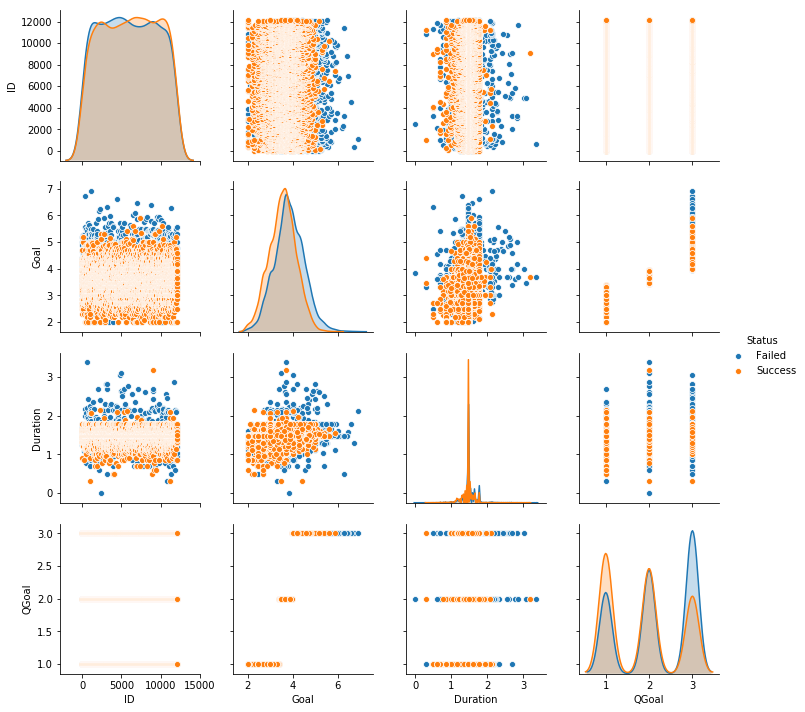

In [14]:
pair_df = train_df.dropna()
sns.pairplot(pair_df,hue='Status')

/home/lenovo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lenovo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


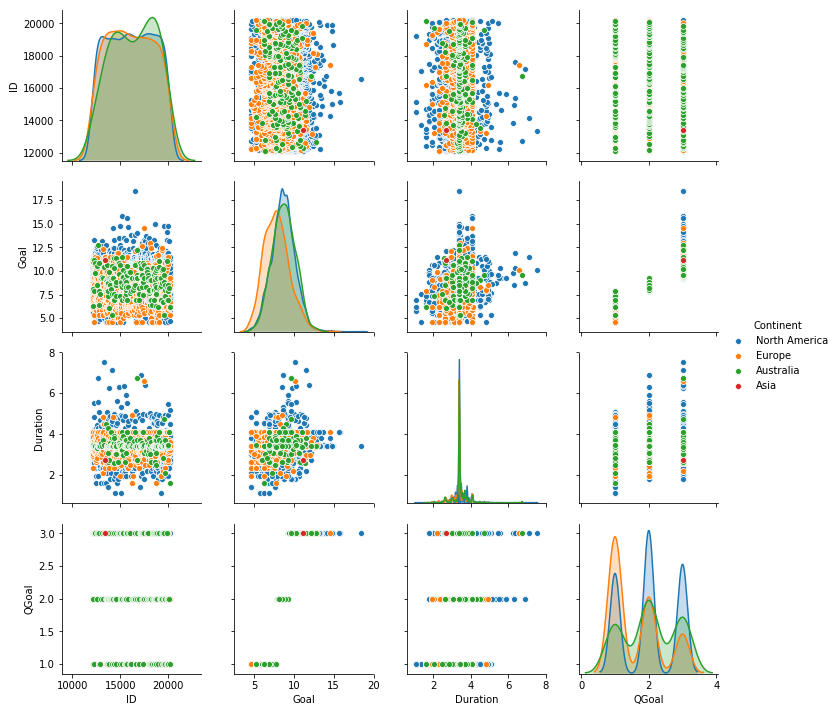

In [15]:
pair_df = test_df.dropna()
sns.pairplot(pair_df,hue='Continent')

In [16]:
train_df.corr()

,ID,Goal,Duration
ID,1.000000,0.008344,-0.004821
Goal,0.008344,1.000000,0.203965
Duration,-0.004821,0.203965,1.000000


In [17]:
# train_df.loc[train_df['Duration'].isnull()==True,:]

In [18]:
from scipy import stats
def anova_gen(df,group_col,continuous_col):
    df_notnull = df.dropna()
    grps = pd.unique(df_notnull[str(group_col)].values)
    d_data = {grp:df_notnull[str(continuous_col)][df_notnull[str(group_col)]==grp] for grp in grps}
    d_data_len = len(d_data)
    args = [ x[1] for x in d_data.items() ]
    print(stats.f_oneway(*args))
anova_gen(train_df,'Category','Duration')

F_onewayResult(statistic=45.49289325397825, pvalue=1.9422148340847617e-226)


In [19]:
train_df['Duration'].fillna(value=train_df['Duration'].mean(),inplace=True)
test_df['Duration'].fillna(value=test_df['Duration'].mean(),inplace=True)


# Model

In [20]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,f1_score,mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing  import LabelEncoder,RobustScaler
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import xgboost as xgb
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

### KNN Impute

In [21]:
# X = train_df.dropna()
# X = X.loc[:,['Category','Currency','Goal','Duration']]
# target = X['Duration']
# X = X.drop('Duration',axis=1)
# scaler = RobustScaler()
# le = LabelEncoder()
# for i in X.select_dtypes('object'):
#     X[str(i)] = le.fit_transform(X[str(i)])
# X = scaler.fit_transform(X)
# X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.3)

# x = []
# y = []

# for i in range(1,15):
#     reg = KNeighborsRegressor(n_neighbors=i)
# #     reg = RandomForestRegressor(n_estimators=i)
#     reg.fit(X_train,y_train)
#     pred = reg.predict(X_test)
#     x.append(i)
#     y.append(mean_absolute_error(y_test,pred))
# plt.plot(x,y)
# plt.show()

In [22]:
# X = train_df.loc[:,['Goal','Duration']]

# X_train = X.loc[X['Duration'].isnull()==False,:]
# X_test = X.loc[X['Duration'].isnull()==True,:]
# y_train = X_train['Duration']
# X_train = X_train.drop(['Duration'],axis=1)

# le = LabelEncoder()

# for i in X_train.select_dtypes('object').columns:
#     le.fit(X_train[str(i)])
    
#     X_train[str(i)] = le.transform(X_train[str(i)])
#     X_test[str(i)] = le.transform(X_test[str(i)]) 
    

# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.fit_transform(X_test)


# clf = KNeighborsRegressor(n_neighbors=10)

# clf.fit(X_train,y_train)
# train_df.loc[train_df['Duration'].isnull()==True,'Duration'] = clf.predict(X_test)
# print(train_df.info())

In [24]:
scaler = RobustScaler()
X = train_df.drop(['ID','Start Date','End Date','Continent','Category'],axis=1)
    

le = LabelEncoder()
for i in X.select_dtypes('object').columns:
    X[str(i)] = le.fit_transform(X[str(i)])
X['Status'] = le.fit_transform(X['Status'])

target = X['Status']
X = X.drop('Status',axis=1) 
# X = pd.get_dummies(X)
# X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)
# print(X_train.info())
# print(X_test.info())
sm = SMOTE(random_state=2,ratio ='auto')
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

criteria = ['gini','entropy']
splitter_val = ['best','random']
min_samples_split = [2, 5, 10,15,20,25,30]
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64]
max_features_val = ['auto','sqrt','log2']
presort_val = [True,False]
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criteria,
               'class_weight': ['balanced_subsample','balanced']
               
               }

# reg = RandomForestClassifier()
# rs_reg = RandomizedSearchCV(estimator = reg,param_distributions=random_grid, n_iter = 20, cv = 4,verbose=2,scoring='f1',n_jobs=3)
# rs_reg.fit(X_train,y_train)
# print(rs_reg.best_params_)
# print(rs_reg.best_score_)
# rs_reg.fit(X_train,y_train)
# reg = DecisinClassifier()

# reg.fit(X_train,y_train)
# pred = rs_reg.predict(X_test)
# pred = reg.predict(X_test)
# print(f1_score(y_test,pred))

# reg.fit(X_train,y_train)
# feature_imp = dict(zip(reg.feature_importances_.tolist(),X_train.columns.tolist()))
# print(feature_imp)
# count=0 
# for key in sorted(feature_imp.keys()): 
#     print(str(count)+ " " + str(key) + ":" + feature_imp[key])
#     count+=1

-'n_estimators': 23, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True
gives 64.5

- {'n_estimators': 78, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
0.6505808757819481

{'n_estimators': 67, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}0.6710700132100396 after scaling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
Category     12120 non-null int64
Currency     12120 non-null int64
Goal         12120 non-null float64
Duration     12120 non-null float64
Continent    12120 non-null int64
QGoal        12120 non-null category
dtypes: category(1), float64(2), int64(3)
memory usage: 485.5 KB
None
Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=12, min_child_weight=3.0, max_depth=10, learning_rate=0.1, gamma=0.75, colsample_bytree=1.0, colsample_bylevel=0.9 
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 50 pruned nodes, max_depth=9
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 58 pruned nodes, max_depth=8
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 48 pruned nodes, max_depth=10
[23:50:37] src/tree/updater_pr

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 76 pruned nodes, max_depth=10
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 92 pruned nodes, max_depth=9
[CV]  subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=12, min_child_weight=3.0, max_depth=10, learning_rate=0.1, gamma=0.75, colsample_bytree=1.0, colsample_bylevel=0.9, total=   0.1s
[CV] subsample=1.0, silent=False, reg_lambda=50.0, n_estimators=12, min_child_weight=3.0, max_depth=10, learning_rate=0.1, gamma=0.75, colsample_bytree=1.0, colsample_bylevel=0.9 
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 56 pruned nodes, max_depth=7
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 64 pruned nodes, max_depth=7
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 54 pruned nodes, max_depth=10
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end,

[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=7
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 16 pruned nodes, max_depth=8
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=8
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 4 pruned nodes, max_depth=6
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 6 pruned nodes, max_depth=10
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 10 pruned nodes, max_depth=9
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 20 pruned nodes, max_depth=8
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, 

[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 8 pruned nodes, max_depth=9
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 8 pruned nodes, max_depth=7
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=6
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 8 pruned nodes, max_depth=7
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 6 pruned nodes, max_depth=8
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 8 pruned nodes, max_depth=9
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=7
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[23:50:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 18 pruned nodes, max

[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=9
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=6
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=8
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=8
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 4 pruned nodes, max_depth=7
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, m

[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=9
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=8
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 2 pruned nodes, max_depth=7
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 16 pruned nodes, max_depth=8
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 4 pruned nodes, max_depth=8
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=8
[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] subsample=0.7

[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 8 pruned nodes, max_depth=10
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 14 pruned nodes, max_depth=10
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 20 pruned nodes, max_depth=10
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 22 pruned nodes, max_depth=10
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 22 pruned nodes, max_depth=9
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 6 pruned nodes, max_depth=10
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 12 pruned nodes, max_depth=9
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 20 pruned nodes, max_depth=10
[23:50:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 18 

[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 18 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 18 pruned nodes, max_depth=9
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 16 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 12 pruned nodes, max_depth=7
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 8 pruned nodes, max_depth=9
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 10 pruned nodes, max_depth=9
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 12 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 18 pruned nodes, max_depth=9
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 20 pruned 

[CV]  subsample=0.8, silent=False, reg_lambda=50.0, n_estimators=23, min_child_weight=3.0, max_depth=20, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.5, total=   0.0s
[CV] subsample=0.8, silent=False, reg_lambda=50.0, n_estimators=23, min_child_weight=3.0, max_depth=20, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.5 
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 18 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=7
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 

[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 50 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 32 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 58 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 42 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 62 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 122 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 30 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 52 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra n

[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 126 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 44 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 58 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 16 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 22 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 48 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 44 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 74 pruned nodes, max_depth=10
[23:50:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra no

[CV]  subsample=0.9, silent=False, reg_lambda=0.1, n_estimators=34, min_child_weight=10.0, max_depth=6, learning_rate=0.001, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.1s
[CV] subsample=0.9, silent=False, reg_lambda=0.1, n_estimators=34, min_child_weight=10.0, max_depth=6, learning_rate=0.001, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 8 pruned nodes, max_depth=6
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=6
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=6
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 2 pruned nodes, max_depth=6
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=6
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 root

[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 24 pruned nodes, max_depth=7
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 10 pruned nodes, max_depth=8
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_de

[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=12
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=13
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=13
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=12
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=15
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=11
[23:50:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned n

[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=11
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=13
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=9
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=11
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=12
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned no

[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=8
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=11
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=10
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=10
[23:50:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=12
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=9
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, 

[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_

[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pruned nodes, max_depth=14
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=15
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=13
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=15
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=15
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=14
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=15
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=12
[23:50:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 p

[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 p

[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=15
[23:50:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 p

[CV]  subsample=0.8, silent=False, reg_lambda=50.0, n_estimators=56, min_child_weight=0.5, max_depth=15, learning_rate=0.1, gamma=0, colsample_bytree=1.0, colsample_bylevel=0.8, total=   0.3s
[CV] subsample=1.0, silent=False, reg_lambda=10.0, n_estimators=67, min_child_weight=0.5, max_depth=10, learning_rate=0.001, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.9 
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 98 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 100 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 26 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 30 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 36 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree prun

[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 36 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 30 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 44 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 12 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 28 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 28 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 38 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 36 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nod

[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 40 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 30 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 48 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 22 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 34 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 42 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 52 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 48 pruned nodes, max_depth=10
[23:50:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nod

[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_

[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[CV]  subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=56, min_child_weight=1.0, max_depth=6, learning_rate=3, gamma=0, colsample_bytree=1.0, colsample_bylevel=0.8, total=   0.1s
[CV] subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=56, min_child_weight=1.0, max_depth=6, learning_rate=3, gamma=0, colsample_bytree=1.0, colsample_bylevel=0.8 
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra 

[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[23:50:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_

[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 80 pruned nodes, max_depth=10
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 80 pruned nodes, max_depth=9
[CV]  subsample=0.7, silent=False, reg_lambda=100.0, n_estimators=78, min_child_weight=3.0, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.9, total=   0.3s
[CV] subsample=0.7, silent=False, reg_lambda=100.0, n_estimators=78, min_child_weight=3.0, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.9 
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 6 pruned nodes, max_depth=6
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 20 pruned nodes, max_depth=8
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 18 pruned nodes, max_depth=5
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1

[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 54 pruned nodes, max_depth=9
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 36 pruned nodes, max_depth=9
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 26 pruned nodes, max_depth=7
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 26 pruned nodes, max_depth=8
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=9
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 44 pruned nodes, max_depth=10
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 50 pruned nodes, max_depth=9
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 54 pruned nodes, max_depth=9
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 22 pruned n

[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 52 pruned nodes, max_depth=10
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 10 pruned nodes, max_depth=9
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 30 pruned nodes, max_depth=10
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 74 pruned nodes, max_depth=8
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 30 pruned nodes, max_depth=10
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 68 pruned nodes, max_depth=10
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 48 pruned nodes, max_depth=8
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 62 pruned nodes, max_depth=9
[23:50:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 58 prune

[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=7
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 14 pruned nodes, max_depth=8
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=7
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_

[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 2 pruned nodes, max_depth=7
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=9
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_

[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=23, min_child_weight=3.0, max_depth=6, learning_rate=0.01, gamma=0.25, colsample_bytree=0.4, colsample_bylevel=0.6, total=   0.0s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=23, min_child_weight=3.0, max_depth=6, learning_rate=0.01, gamma=0.25, colsample_bytree=0.4, colsample_bylevel=0.6 
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=5
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 6 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=6
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:50:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_dep

[CV]  subsample=0.8, silent=False, reg_lambda=1.0, n_estimators=67, min_child_weight=1.0, max_depth=6, learning_rate=0, gamma=1.0, colsample_bytree=0.4, colsample_bylevel=0.4, total=   0.1s
[CV] subsample=0.8, silent=False, reg_lambda=1.0, n_estimators=67, min_child_weight=1.0, max_depth=6, learning_rate=0, gamma=1.0, colsample_bytree=0.4, colsample_bylevel=0.4 
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 12 pruned nodes, max_depth=6
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=6
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 10 pruned nodes, max_depth=6
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 ex

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   10.9s finished


[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 18 pruned nodes, max_depth=7
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 48 pruned nodes, max_depth=10
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 60 pruned nodes, max_depth=10
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 28 pruned nodes, max_depth=9
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 54 pruned nodes, max_depth=10
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 54 pruned nodes, max_depth=9
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 32 pruned nodes, max_depth=10
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 54 pruned nodes, max_depth=10
[23:50:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 42 prun

/home/lenovo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


NameError: name 'pyplot' is not defined

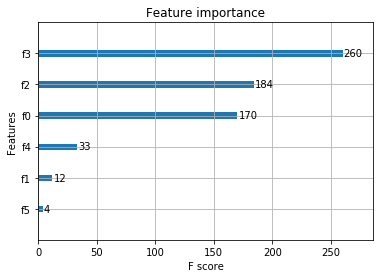

In [25]:
X = train_df.drop(['ID','Start Date','End Date'],axis=1)
 

le = LabelEncoder()
for i in X.select_dtypes('object').columns:
    X[str(i)] = le.fit_transform(X[str(i)])
target = X['Status']
X = X.drop('Status',axis=1)
print(X.info())
# X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)
# print(X_train.info())
# print(X_test.info())
X = scaler.fit_transform(X)
sm = SMOTE(random_state=2,ratio ='auto')
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5,0.75, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]}


rs_reg = RandomizedSearchCV(clf, param_grid, n_iter=20, verbose=2, cv=4,scoring='roc_auc')
rs_reg.fit(X_train,y_train)
print(rs_reg.best_params_)
print(rs_reg.best_score_)

# reg = xgb.XGBClassifier()
# reg.fit(X_train,y_train)
# pred = reg.predict(X_test.values)

pred = rs_reg.predict(X_test.values)
print(f1_score(y_test,pred))
clf.fit(X_train,y_train)
plot_importance(clf)
pyplot.show()

'subsample': 0.7, 'silent': False, 'reg_lambda': 50.0, 'n_estimators': 100, 'min_child_weight': 5.0, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 1.0, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.4 0.751
'subsample': 0.9, 'silent': False, 'reg_lambda': 50.0, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.25, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.4 0.653153153153153

'subsample': 0.9, 'silent': False, 'reg_lambda': 50.0, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.25, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.4}
0.655590480466996

{'subsample': 1.0, 'silent': False, 'reg_lambda': 0.1, 'n_estimators': 100, 'min_child_weight': 5.0, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1.0, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6}
0.6727828746177371

{'subsample': 0.9, 'silent': False, 'reg_lambda': 5.0, 'n_estimators': 12, 'min_child_weight': 1.0, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.75, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.5}
0.6634699215344377

{'subsample': 0.7, 'silent': False, 'reg_lambda': 10.0, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 1.0, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5}
0.6649214659685865 with new features

{'subsample': 0.7, 'silent': False, 'reg_lambda': 0.1, 'n_estimators': 67, 'min_child_weight': 0.5, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.75, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}
0.6696997270245679 with new features

'subsample': 0.9, 'silent': False, 'reg_lambda': 1.0, 'n_estimators': 56, 'min_child_weight': 1.0, 'max_depth': 6, 'learning_rate': 0.001, 'gamma': 0, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5

In [35]:
X_train = train_df.drop(['Start Date','End Date'],axis=1)
X_test = test_df.drop(['Start Date','End Date'],axis=1)
ID = test_df['ID']
for i in X_train.select_dtypes('object').columns:
    
    le.fit(X_train[str(i)])
    
    if(str(i)=='Status'):
        print(le.classes_)
    X_train[str(i)] = le.transform(X_train[str(i)])
    if(str(i)!='Status'):
        X_test[str(i)] = le.transform(X_test[str(i)])
y_train = X_train['Status']
X_train = X_train.drop(['Status'],axis=1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# sm = SMOTE(random_state=2,ratio ='auto')
# X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

# reg = RandomForestClassifier(n_estimators = 67, min_samples_split= 5, min_samples_leaf=2, max_features='sqrt', max_depth= 10, criterion= 'entropy', class_weight= 'balanced', bootstrap= True)
reg = xgb.XGBClassifier(subsample= 0.7, silent= False, reg_lambda= 0.1, n_estimators= 67,min_child_weight=0.5, max_depth= 6, learning_rate= 0.2, gamma=0.75, colsample_bytree= 0.7, colsample_bylevel= 0.5)
# reg = xgb.XGBClassifier()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

['Failed' 'Success']
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 6 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 4 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 4 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 2 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 12 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 10 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 14 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 10 pruned nodes, max_depth=6
[23:53:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra 

/home/lenovo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
final = {'ID':ID,
        'Status':pred}
final_df = pd.DataFrame(final)
final_df.loc[final_df.Status==1,'Status'] = 'Success'
final_df.loc[final_df.Status==0,'Status'] = 'Failed'
print(final_df.info())
final_df['Status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 2 columns):
ID        8080 non-null int64
Status    8080 non-null object
dtypes: int64(1), object(1)
memory usage: 126.3+ KB
None


Failed     4205
Success    3875
Name: Status, dtype: int64

In [33]:
final_df.to_csv('submission.csv',index=False)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 10 columns):
ID            12120 non-null int64
Start Date    12118 non-null datetime64[ns]
End Date      9473 non-null datetime64[ns]
Category      12120 non-null object
Currency      12120 non-null object
Goal          12120 non-null float64
Status        12120 non-null object
Duration      12120 non-null float64
Continent     12120 non-null object
QGoal         12120 non-null category
dtypes: category(1), datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 864.2+ KB


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 9 columns):
ID            8080 non-null int64
Start Date    8078 non-null datetime64[ns]
End Date      6261 non-null datetime64[ns]
Category      8080 non-null object
Currency      8080 non-null object
Goal          8080 non-null float64
Duration      8080 non-null float64
Continent     8080 non-null object
QGoal         8080 non-null category
dtypes: category(1), datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 513.1+ KB
